In [26]:
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
import pandas as pd

In [27]:
cidades = ["aracaju", "joaopessoa", "maceio", "natal", "recife", "salvador", "saoluis", "teresina", "fortaleza"]

def create_Metrics_dataframe(cidades):

    dict_metrics_list = []

    for cidade in cidades:
        # Using readlines()
        #print(cidade)
        list_of_files = glob.glob("./cidades/{0}/AutoMLResults/results_*.txt".format(cidade)) # * means all if need specific format then *.csv
        last_result_file = os.path.basename(max(list_of_files, key=os.path.getctime))
        #print(last_result_file)
        results_file = open("./cidades/{0}/AutoMLResults/{1}".format(cidade, last_result_file), 'r')
        result_Lines = results_file.readlines()
        
        count = 0
        # Strips the newline character
        for line in result_Lines:
            count += 1
            lineContent = line.strip()
            #print("Line{}: {}".format(count, lineContent))
            if "Scores" not in lineContent:
                dict_metrics = {"city":"", "metric":"", "value":"", "automl":""}
                metric=lineContent[lineContent.find("-")+1:lineContent.find(":")].strip()
                value=float(lineContent[lineContent.find(":")+1:].strip())
                automl=lineContent[:lineContent.find("-")-1].strip()
                if metric != "MAPE":
                    dict_metrics["city"]=cidade
                    dict_metrics["metric"]=metric
                    dict_metrics["value"]=value
                    dict_metrics["automl"]=automl
                    dict_metrics_list.append(dict_metrics)

    df = pd.DataFrame(dict_metrics_list)
    df.replace("joaopessoa", "João Pessoa", inplace=True)
    df.replace("saoluis", "São Luis", inplace=True)
    df.replace("maceio", "Maceió", inplace=True)
    df.city = df.city.apply(lambda x: x.capitalize())

    return df

def countWinners(dataFrame):
    ACOCLSTM_wins = []
    ACOLSTM_wins = []
    AUTOKERAS_wins = []
    AGMMFF_wins = []
    TPOT_wins = []
    HYPEROPT_wins = []
    for metric in dataFrame.metric.unique():
        for city in dataFrame.city.unique():
            print(df_metrics[(df_metrics["metric"]==metric) & (df_metrics["city"]==city)].sort_values(by="value", ascending=True))
            winner = df_metrics[(df_metrics["metric"]==metric) & (df_metrics["city"]==city)].sort_values(by="value", ascending=True).automl.values[0]
            if winner == "ACOLSTM":
                ACOLSTM_wins.append(city+" - "+metric)
            elif winner == "ACOCLSTM":
                ACOLSTM_wins.append(city+" - "+metric)
            elif winner == "AGMMFF":
                AGMMFF_wins.append(city+" - "+metric)
            elif winner == "TPOT":
                TPOT_wins.append(city+" - "+metric)
            elif winner == "HYPEROPT":
                HYPEROPT_wins.append(city+" - "+metric)
            elif winner == "AUTOKERAS":
                AUTOKERAS_wins.append(city+" - "+metric)
        
    return {"ACOLSTM":ACOLSTM_wins, "ACOCLSTM":ACOCLSTM_wins, "AUTOKERAS":AUTOKERAS_wins,
     "AGMMFF":AGMMFF_wins, "TPOT":TPOT_wins, "HYPEROPT":HYPEROPT_wins}

In [28]:
df_metrics = create_Metrics_dataframe(cidades)
automl_wins = countWinners(df_metrics)
print(automl_wins)

       city metric   value     automl
12  Aracaju    MAE  0.0173    ACOLSTM
0   Aracaju    MAE  0.0187       TPOT
9   Aracaju    MAE  0.0221     AGMMFF
15  Aracaju    MAE  0.0738   ACOCLSTM
3   Aracaju    MAE  0.0772   HYPEROPT
6   Aracaju    MAE  0.0787  AUTOKERAS
           city metric   value     automl
18  João pessoa    MAE  0.0274       TPOT
27  João pessoa    MAE  0.0380     AGMMFF
24  João pessoa    MAE  0.0458  AUTOKERAS
21  João pessoa    MAE  0.0492   HYPEROPT
30  João pessoa    MAE  0.0576    ACOLSTM
33  João pessoa    MAE  0.0957   ACOCLSTM
      city metric   value     automl
36  Maceió    MAE  0.0329       TPOT
39  Maceió    MAE  0.0329   HYPEROPT
42  Maceió    MAE  0.0350  AUTOKERAS
48  Maceió    MAE  0.0350    ACOLSTM
45  Maceió    MAE  0.0359     AGMMFF
51  Maceió    MAE  0.1622   ACOCLSTM
     city metric   value     automl
66  Natal    MAE  0.0320    ACOLSTM
69  Natal    MAE  0.0431   ACOCLSTM
54  Natal    MAE  0.0467       TPOT
63  Natal    MAE  0.0468     AGMMFF
5

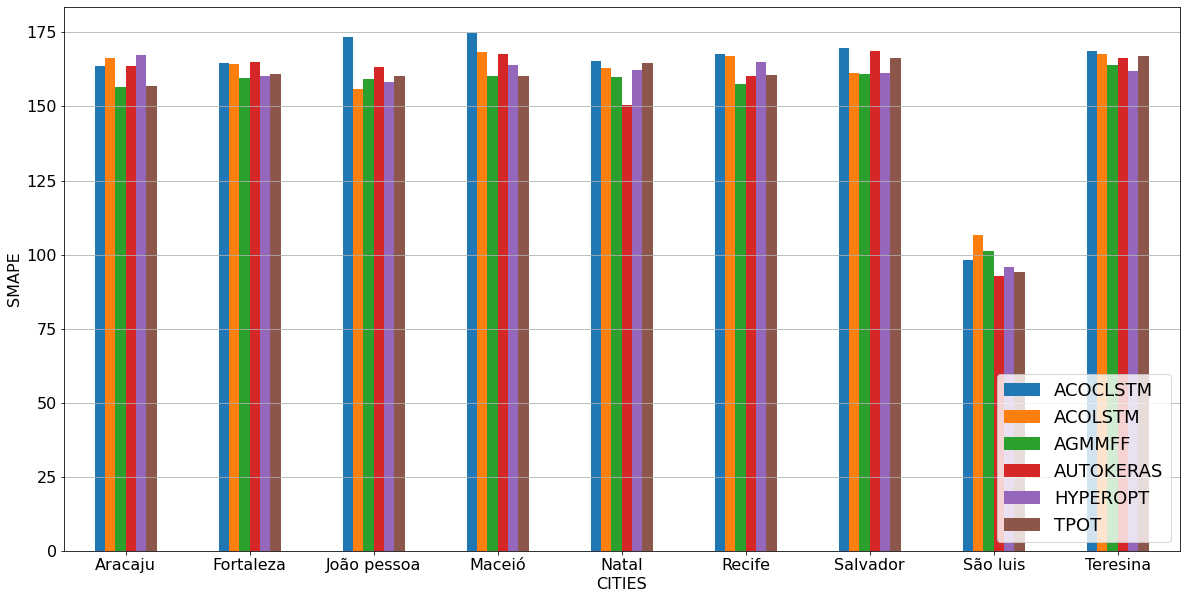

In [29]:
df_pivot = df_metrics[df_metrics["metric"]=="SMAPE"].pivot(index="city", columns="automl", values="value")
ax1 = df_pivot.sort_values(by=("city")).plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('SMAPE',fontdict={'fontsize':16})
#ax1.set_yticks(list(range(0,10,200)))
ax1.grid(axis='y')
ax1.legend(loc=4,prop=dict(size=18))

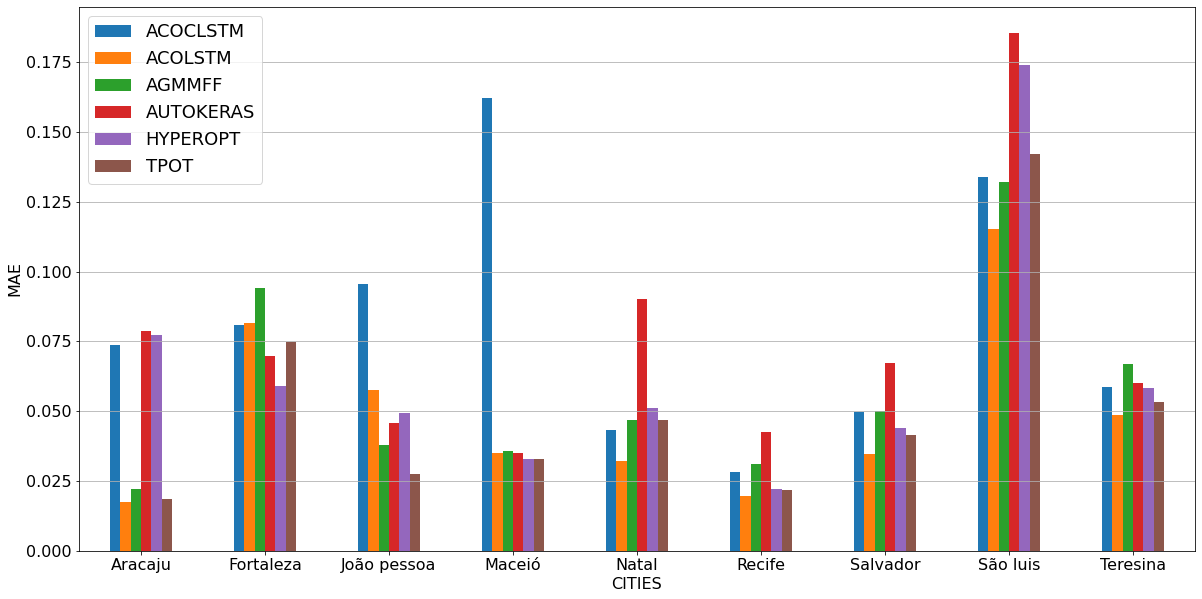

In [30]:
df_pivot = df_metrics[df_metrics["metric"]=="MAE"].pivot(index="city", columns="automl", values="value")
ax1 = df_pivot.sort_values(by=("city")).plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('MAE',fontdict={'fontsize':16})
#ax1.set_yticks(list(range(0,10,200)))
ax1.grid(axis='y')
ax1.legend(loc=0,prop=dict(size=18))

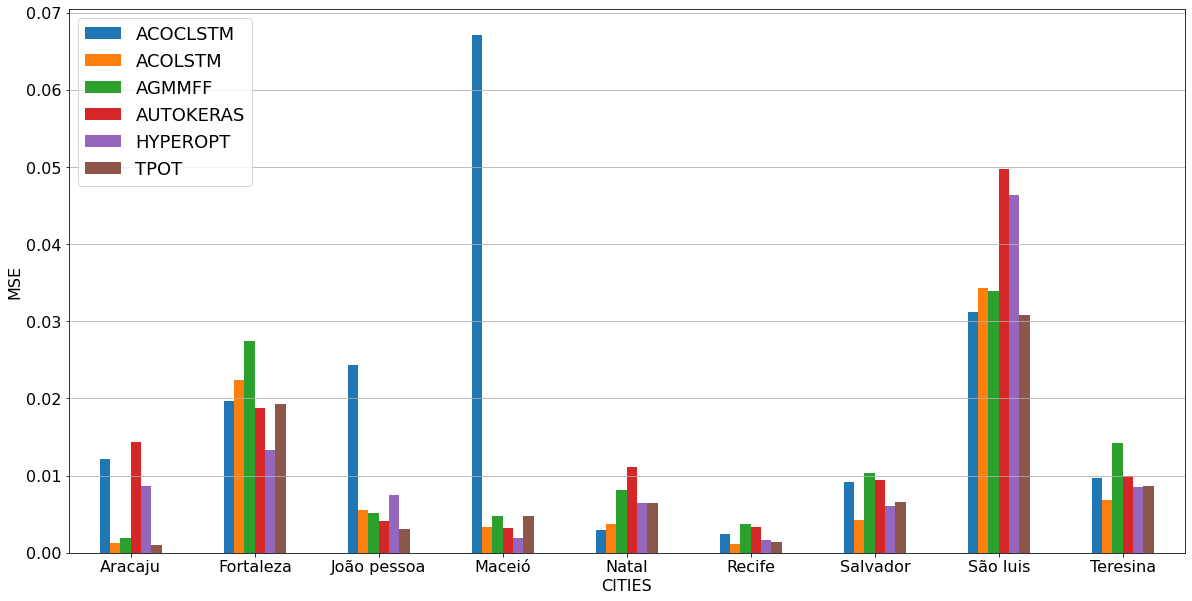

In [31]:
df_pivot = df_metrics[df_metrics["metric"]=="MSE"].pivot(index="city", columns="automl", values="value")
ax1 = df_pivot.sort_values(by=("city")).plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('MSE',fontdict={'fontsize':16})
#ax1.set_yticks(list(range(0,10,200)))
ax1.grid(axis='y')
ax1.legend(loc=0,prop=dict(size=18))